# Midterm Project: Predicting Profit Margins

**Objective**:  
The goal of this project is to analyze sales data and build a machine learning model to predict **sales & profit margins** for different products based on various features such as sales quantity, discounts, and costs.

**Problem Statement:**

This project is an in-depth analysis of SuperStore’s transaction data aimed at uncovering insights to support strategic business decisions. By exploring this dataset, I seek to understand the key drivers of sales and profitability, with a focus on customer segments, product categories, discounting practices, and regional performance.

The objectives of this analysis are:

1. Identify Financial Drivers: Conduct an in-depth examination of factors such as customer demographics, discount levels, and regional sales to determine which variables most significantly impact revenue and profitability. This will highlight high-value areas that SuperStore may prioritize to enhance overall financial performance.

2. Develop Predictive Models: Utilize linear regression to forecast sales and profit margins and logistic regression to classify orders as profitable or non-profitable. These models will aid in projecting future performance and guiding inventory, pricing, and marketing decisions.

3. Provide Actionable Recommendations: Based on the insights gained from financial analysis and predictive modeling, this project will offer data-driven strategies to optimize SuperStore’s revenue growth and profitability. Recommendations will cover discount policies, customer targeting, and inventory management.

This project serves as both a personal development initiative to refine my data science and financial analysis skills and a practical exploration of how data-driven insights can address real-world business challenges in the retail sector.



#### Dataset Overview
The dataset contains sales records with features like:
- **Order and Shipping Details**: Order date, ship date, and processing time.
- **Customer and Product Information**: Product category, subcategory, segment, and manufacturer.
- **Financial Metrics**: Selling price, discount, cost, and profit.

#### Steps:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis
3. Validation Framework
4. Model Building, and Training
5. Model Evaluation


## Section 1: Data Cleaning and Preprocessing
___

### Importing the necessary libraries. and loading the dataset



In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import skimpy as sp
import dtale as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# file path of the CSV file
file_path = '/Users/teslim/OneDrive/mlzoomcamp/superstore_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Preview the loaded data
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


### Data Processing

In [4]:
# check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

In [5]:
# check the shape of the dataset
df.shape

(9994, 19)

In [6]:
# summary overview 
df.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


In [7]:
# check for missing values
df.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

### Feature Analysis for Predicting Superstore Sales

#### Traget Variable

1. **Sales (`sales`)**: This is the target variable to predict. It represents the total sales revenue generated from each order.
2. **Profit (`profit`)**: This is another target variable we to predict. It represents the total profit generated from each order.



#### Most Relevant Features

1. **Order Date (`order_date`)**  
   Helps capture seasonality and trends in sales, which can be important for understanding peak times and forecasting future sales.

2. **Ship Date (`ship_date`)**  
   Can provide insights into logistics efficiency and its potential effect on sales, such as delayed orders which might impact customer satisfaction and future sales.

3. **Customer (`customer`)**  
   Different customers may have different spending habits, allowing to better understand customer behavior and segment sales predictions.

4. **Manufactory (`manufactory`)**  
   Manufacturer-related differences can influence the sales of specific product lines. Some manufacturers might perform better due to brand loyalty or perceived quality.

5. **Product Name (`product_name`)**  
   This feature can help if to differentiate sales based on specific products. Some products might be more popular or have higher margins, which can significantly impact sales.

6. **Segment (`segment`)**  
   Sales to different segments (e.g., Corporate, Consumer, Home Office) might vary significantly in terms of volume and price.

7. **Category (`category`)** and **Subcategory (`subcategory`)**  
   Understanding which category or subcategory a product belongs to helps group products into broader segments, which can significantly affect sales patterns.

8. **Region (`region`)**, **City (`city`)**, **State (`state`)**, **Country (`country`)**  
   Geographical features are important as they can indicate regional differences in demand, preferences, and buying power.

9. **Discount (`discount`)**  
   Sales are highly influenced by discounts. This is a very important feature to include as it directly affects sales numbers.

10. **Quantity (`quantity`)**  
    The quantity sold is clearly correlated with sales revenue and is a crucial input for sales prediction.

11. **Profit Margin (`profit_margin`)**  
    Profit margin can indicate how pricing strategies influence sales.

#### Less Relevant Features

1. **Zip (`zip`)**  
   The zip code can provide fine geographical details, but including city, state, and region might already cover these geographical distinctions adequately. it is consider removing to avoid overfitting unless specific local analysis is needed.

2. **Order ID(`order_id`)**  
   This is a unique identifier for each order and is not directly related to sales prediction. It is better to exclude it from the analysis.

4. **Country (`country`)**  
   The dataset is limited to a single country, this feature might not provide much variation and can be excluded.


In [8]:
# listing all the columns 
df.columns.to_list()

['order_id',
 'order_date',
 'ship_date',
 'customer',
 'manufactory',
 'product_name',
 'segment',
 'category',
 'subcategory',
 'region',
 'zip',
 'city',
 'state',
 'country',
 'discount',
 'profit',
 'quantity',
 'sales',
 'profit_margin']

In [9]:
# droping irrelevant columns 
df.drop(columns=['zip','order_id', 'country'], inplace=True)

In [10]:
# check the shape of the dataset after dropping these 3 columns
df.shape

(9994, 16)

The next stage is to derive new features from the existing data that can provide additional insights and improve the predictive power of the models. These features are:

- **Order Processing Time**: The time taken between order and shipment can indicate efficiency and customer satisfaction.
- **Product Price**: The price of the product can be a key factor in determining sales revenue.
- **Discount Amount**: The actual discount amount can be more informative than just the discount percentage. 

#### Order processing time


In [11]:
# convertin the order_date, and ship_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

df['ship_date'] = pd.to_datetime(df['ship_date'])

# check the data types of the columns
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     9994 non-null   datetime64[ns]
 1   ship_date      9994 non-null   datetime64[ns]
 2   customer       9994 non-null   object        
 3   manufactory    9994 non-null   object        
 4   product_name   9994 non-null   object        
 5   segment        9994 non-null   object        
 6   category       9994 non-null   object        
 7   subcategory    9994 non-null   object        
 8   region         9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  discount       9994 non-null   float64       
 12  profit         9994 non-null   float64       
 13  quantity       9994 non-null   int64         
 14  sales          9994 non-null   float64       
 15  profit_margin  9994 n

In [12]:
# Deriving new columns from the order_processing_time column

df['order_process_time'] = df['ship_date'] - df['order_date']

In [13]:
# check the data types of the columns
df['order_date']

0      2019-01-03
1      2019-01-04
2      2019-01-04
3      2019-01-04
4      2019-01-05
          ...    
9989   2022-12-30
9990   2022-12-30
9991   2022-12-30
9992   2022-12-30
9993   2022-12-30
Name: order_date, Length: 9994, dtype: datetime64[ns]

In [14]:
df['ship_date']

0      2019-01-07
1      2019-01-08
2      2019-01-08
3      2019-01-08
4      2019-01-12
          ...    
9989   2023-01-05
9990   2023-01-03
9991   2023-01-03
9992   2023-01-03
9993   2023-01-03
Name: ship_date, Length: 9994, dtype: datetime64[ns]

In [15]:
# the higher the order_process_time, the likely the customer will not be satisfied
df['order_process_time'] = df['order_process_time'].dt.total_seconds() / (24 * 3600)  # convert to days

In [16]:
df['order_process_time']

0       4.0
1       4.0
2       4.0
3       4.0
4       7.0
       ... 
9989    6.0
9990    4.0
9991    4.0
9992    4.0
9993    4.0
Name: order_process_time, Length: 9994, dtype: float64

#### Selling Product Price per Unit

In [17]:
# determination of product price per unit
df['selling_price_per_unit'] = df['sales'] / df['quantity']
df['selling_price_per_unit'].head()

0     8.224
1     1.770
2     3.928
3    90.912
4     6.512
Name: selling_price_per_unit, dtype: float64

#### Discount Amount per Order


In [18]:
# determination of discount per unit
df['discount_per_unit'] = df['discount'] * df['selling_price_per_unit']
df['discount_per_unit'].head()

0     1.6448
1     1.4160
2     0.7856
3    18.1824
4     1.3024
Name: discount_per_unit, dtype: float64

####  product profit per unit


In [19]:
df['profit_per_unit'] = df['profit'] / df['quantity']
df['profit_per_unit'].head()

0     2.7756
1    -2.7435
2     1.4239
3   -21.5916
4     1.6280
Name: profit_per_unit, dtype: float64

#### cost per unit

In [20]:
# determination of cost per unit
df['cost_per_unit'] = df['selling_price_per_unit'] - df['profit_per_unit'] - df['discount_per_unit']
df['cost_per_unit'].head()

0     3.8036
1     3.0975
2     1.7185
3    94.3212
4     3.5816
Name: cost_per_unit, dtype: float64

In [21]:
# Preview the loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_date              9994 non-null   datetime64[ns]
 1   ship_date               9994 non-null   datetime64[ns]
 2   customer                9994 non-null   object        
 3   manufactory             9994 non-null   object        
 4   product_name            9994 non-null   object        
 5   segment                 9994 non-null   object        
 6   category                9994 non-null   object        
 7   subcategory             9994 non-null   object        
 8   region                  9994 non-null   object        
 9   city                    9994 non-null   object        
 10  state                   9994 non-null   object        
 11  discount                9994 non-null   float64       
 12  profit                  9994 non-null   float64 

In [22]:
df.columns.to_list()    

['order_date',
 'ship_date',
 'customer',
 'manufactory',
 'product_name',
 'segment',
 'category',
 'subcategory',
 'region',
 'city',
 'state',
 'discount',
 'profit',
 'quantity',
 'sales',
 'profit_margin',
 'order_process_time',
 'selling_price_per_unit',
 'discount_per_unit',
 'profit_per_unit',
 'cost_per_unit']

### Data Overview

In [23]:
# Preview the loaded data
dt.show(df)

In [24]:
# summary statistics of the dataframe 
sp.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9994   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 9     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 2     │                                                          │
│                                │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ discount              │   0 │     0 │ 0.1562 │ 0.2065 │      0 │      0 │    0.2 │    0.2 │   0.8 │ ▇▆   ▁ │  │
│ │ profit                │   0 │     0 │  28.66 │  234.3 │  -6600 │  1.729 │  8.666 │  29.36 │  8400 │    ▇   │  │
│ │ quantity              │   0 │     0 │   3.79 │  2.225 │      1 │      2 │      3 │      5 │    14 │  ▇▃▂▁  │  │
│ │ sales                 │   0 │     0 │  229.9 │  623.2 │  0.444 │  17.28 │  54.49 │  209.9 │ 22640 │   ▇    │  │
│ │ profit_margin         │   0 │     0 │ 0.1203 │ 0.4668 │  -2.75 │  0.075 │   0.27 │ 0.3625 │   0.5 │     ▁▇ │  │
│ │ order_process_time    │   0 │     0 │  3.958 │  1.748 │      0 │      3 │      4 │      5 │     7 │ ▃▃▃▇▆▅ │  │
│ │ selling_price_per_uni │   0 │     0 │  60.92 │  142.9 │  0.336 │   5.47 │  16.27 │  63.94 │  3773 │   ▇    │  │
│ │ t                     │     │       │        │        │        │        │        │        │       │        │  │
│ │ discount_per_unit     │   0 │     0 │  8.548 │  33.96 │      0 │      0 │ 0.4608 │  4.798 │  1887 │   ▇    │  │
│ │ profit_per_unit       │   0 │     0 │  7.799 │  56.07 │  -1320 │ 0.7228 │  2.767 │  8.703 │  1680 │    ▇   │  │
│ │ cost_per_unit         │   0 │     0 │  44.57 │   97.7 │ 0.3861 │  3.267 │  10.96 │   48.5 │  2188 │   ▇    │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ order_date             │      0 │         0 │     2019-01-03      │     2022-12-30      │ None             │  │
│ │ ship_date              │      0 │         0 │     2019-01-07      │     2023-01-05      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━

### indentify categorical and numerical columns

In [25]:
# collection of the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['discount',
 'profit',
 'quantity',
 'sales',
 'profit_margin',
 'order_process_time',
 'selling_price_per_unit',
 'discount_per_unit',
 'profit_per_unit',
 'cost_per_unit']

In [26]:
# collection of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns


['customer',
 'manufactory',
 'product_name',
 'segment',
 'category',
 'subcategory',
 'region',
 'city',
 'state']

## Section 2: Exploratory Data Analysis
___

### Explanatory of categorical columns

In [27]:
# checking the unique count of the categorical columns 
df[categorical_columns].nunique()

customer         793
manufactory      182
product_name    1849
segment            3
category           3
subcategory       17
region             4
city             531
state             49
dtype: int64

### Explanatory of numerical columns

In [28]:
# check the summary of the numerical columns
df[numerical_columns].describe()

,discount,profit,quantity,sales,profit_margin,order_process_time,selling_price_per_unit,discount_per_unit,profit_per_unit,cost_per_unit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,28.656896,3.789574,229.858001,0.120314,3.958475,60.919569,8.547946,7.799372,44.572251
std,0.206452,234.260108,2.225110,623.245101,0.466754,1.747603,142.927440,33.958865,56.074974,97.698409
min,0.000000,-6599.978000,1.000000,0.444000,-2.750000,0.000000,0.336000,0.000000,-1319.995600,0.386100
25%,0.000000,1.728750,2.000000,17.280000,0.075000,3.000000,5.470000,0.000000,0.722800,3.267000
50%,0.200000,8.666500,3.000000,54.490000,0.270000,4.000000,16.270000,0.460800,2.767000,10.956900
75%,0.200000,29.364000,5.000000,209.940000,0.362500,5.000000,63.940000,4.798400,8.703200,48.500400
max,0.800000,8399.976000,14.000000,22638.480000,0.500000,7.000000,3773.080000,1886.540000,1679.995200,2188.386400


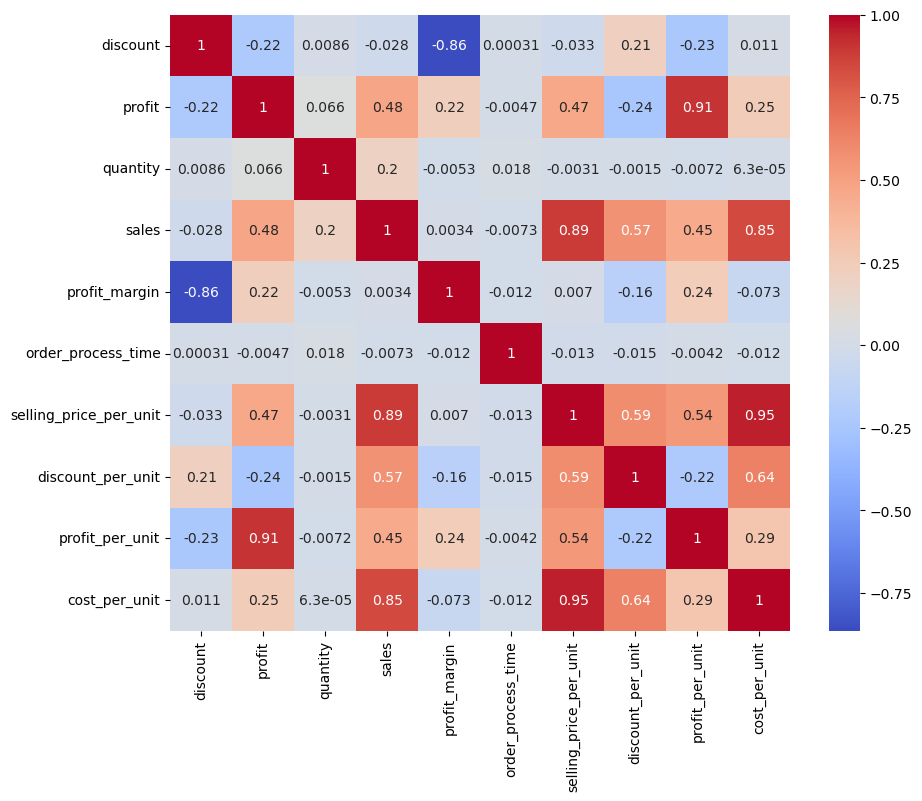

In [29]:
# view the correlation among the features 
correlation = df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

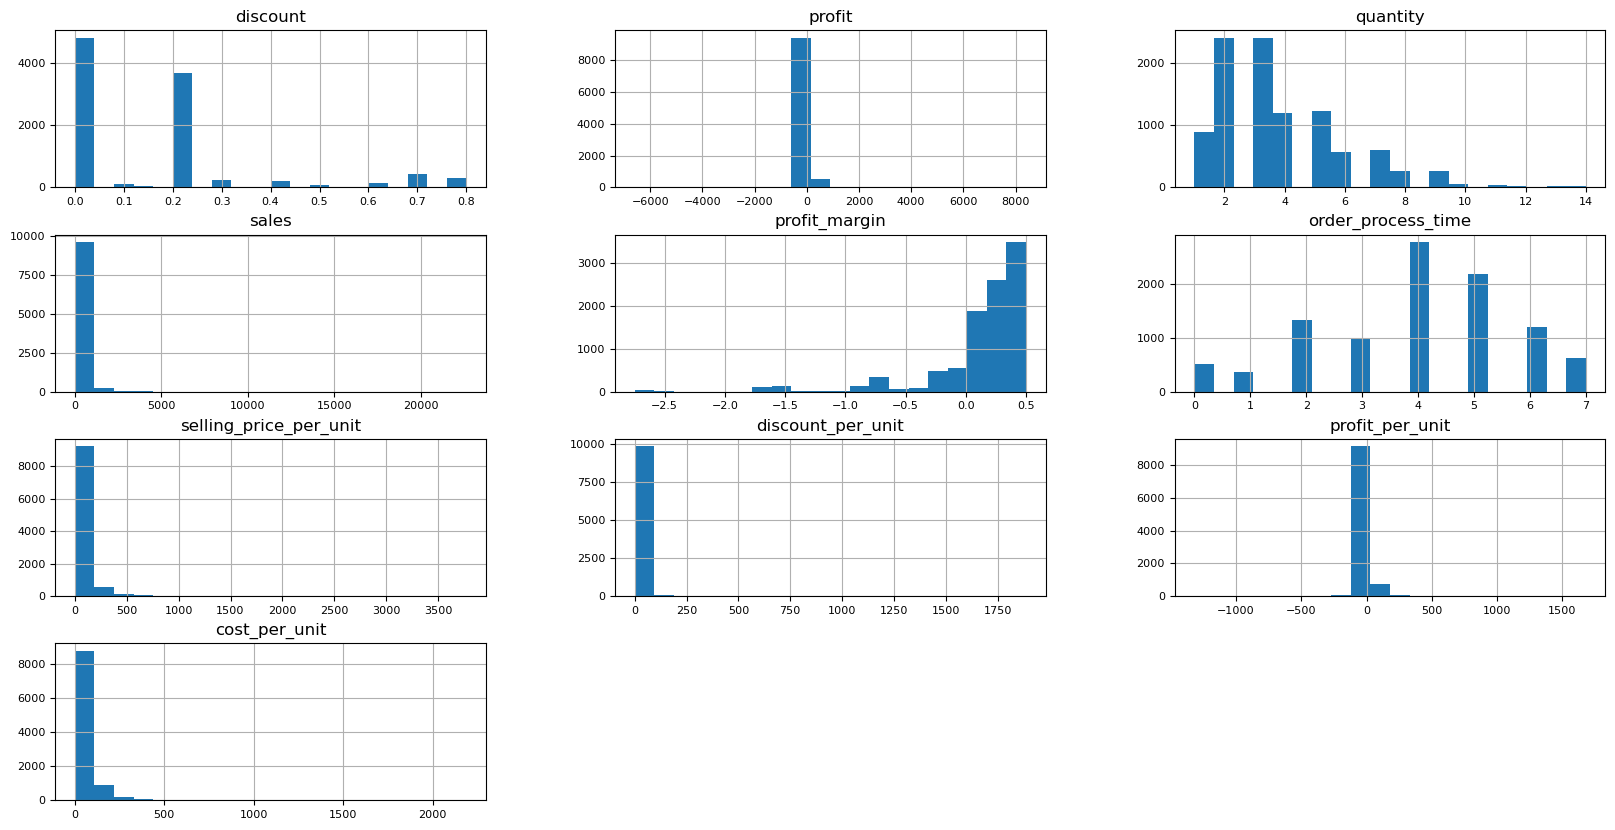

In [30]:
# understanding the distribution of the numerical columns
df[numerical_columns].hist(figsize=(20, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

### Normalising the target variable 

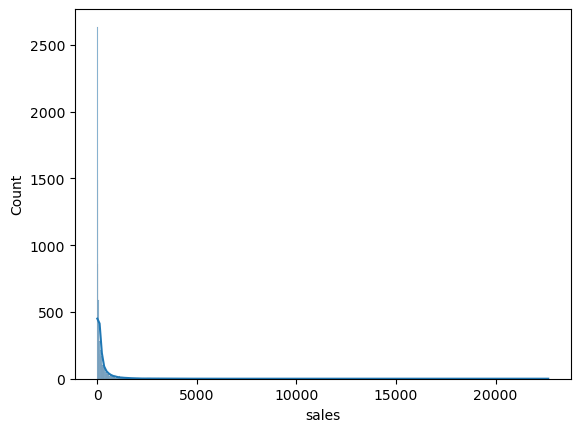

In [31]:
# view the sales target variable before normalisation 
sns.histplot(df['sales'], kde=True)
plt.show()

<Axes: xlabel='profit', ylabel='Count'>

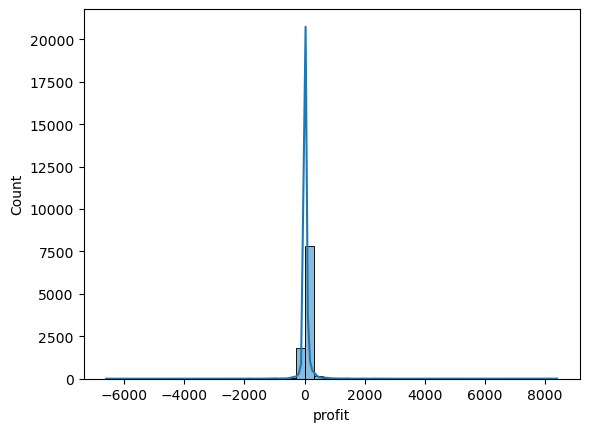

In [32]:
# view the profit target variables 
sns.histplot(df.profit, bins=50, kde=True)

<Axes: xlabel='sales', ylabel='Count'>

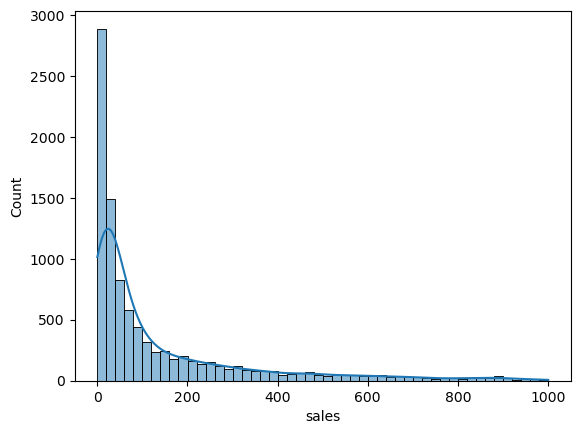

In [33]:
# check the closer group of the sales target that is less than 1000
sns.histplot(df.sales[df.sales < 1000], bins=50, kde=True)

In [34]:
# using the log scale to plot the histogram
sales_logs = np.log1p(df.sales)


In [35]:
profit_logs = np.log1p(df.profit)

/Users/teslim/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



<Axes: xlabel='sales', ylabel='Count'>

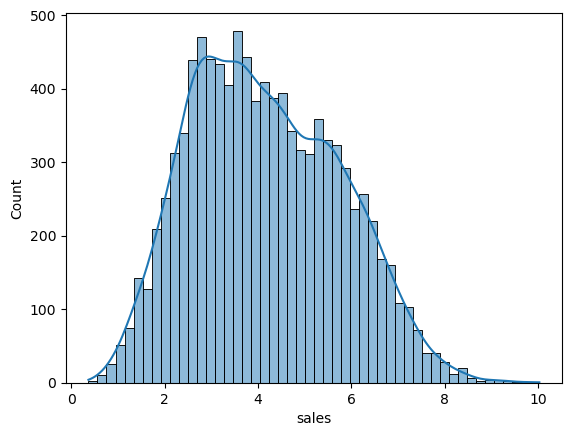

In [36]:
# Checking the histogram of the price_logs
sns.histplot(sales_logs, bins=50, kde=True)

<Axes: xlabel='profit', ylabel='Count'>

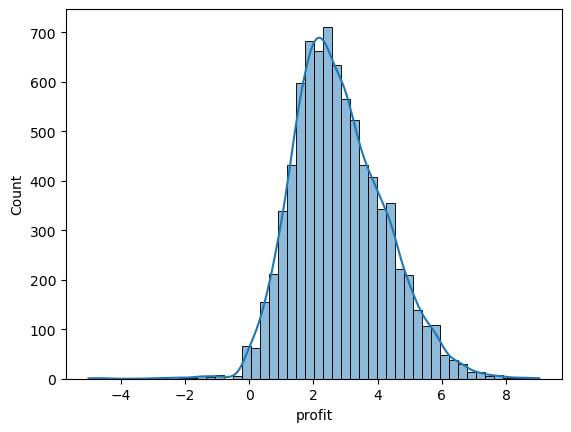

In [37]:
# Checking the histogram of the profit_logs
sns.histplot(profit_logs, bins=50, kde=True)

## Section 3: Validation Framework
___

### Splitting the data into training and testing sets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# splitting the data into training and testing
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=8)

# splitting the training data into training and validation
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=8)

In [40]:
# checking the length of the data
len(df_train), len(df_val), len(df_test)

(5996, 1999, 1999)

In [41]:
# reseting the index after splitting 
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [42]:
# assigning the target variables to the y_train and y_val
y_train = df_train.sales.values
y_val = df_val.sales.values
y_test = df_test.sales.values

In [43]:
# deleting the target variables from the data
del df_train['sales']
del df_val['sales']
del df_test['sales']

In [44]:
df_train.shape, df_val.shape, df_test.shape

((5996, 20), (1999, 20), (1999, 20))

In [45]:
# checking to confirm that the target sales variables is deleted 
df_train.head()

,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,city,state,discount,profit,quantity,profit_margin,order_process_time,selling_price_per_unit,discount_per_unit,profit_per_unit,cost_per_unit
0,2020-03-19,2020-03-23,Berenike Kampe,Universal,Self-Adhesive Address Labels for Typewriters b...,Consumer,Office Supplies,Labels,West,San Bernardino,California,0.0,6.8714,2,0.4700,4.0,7.310,0.0000,3.4357,3.8743
1,2022-11-28,2022-12-02,Emily Phan,Other,Round Specialty Laser Printer Labels,Consumer,Office Supplies,Labels,West,San Diego,California,0.0,29.4455,5,0.4700,4.0,12.530,0.0000,5.8891,6.6409
2,2019-03-17,2019-03-24,Bradley Nguyen,Newell,Newell 35,Consumer,Office Supplies,Art,Central,Lakeville,Minnesota,0.0,5.7072,6,0.2900,7.0,3.280,0.0000,0.9512,2.3288
3,2019-09-22,2019-09-24,Maribeth Schnelling,Avery,Avery File Folder Labels,Consumer,Office Supplies,Labels,South,Boca Raton,Florida,0.2,1.6704,2,0.3625,2.0,2.304,0.4608,0.8352,1.0080
4,2022-07-14,2022-07-18,Toby Carlisle,Eldon,"Eldon 200 Class Desk Accessories, Burgundy",Consumer,Furniture,Furnishings,West,Westminster,California,0.0,7.9128,3,0.4200,4.0,6.280,0.0000,2.6376,3.6424


In [46]:
# list of all the available columns 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996 entries, 0 to 5995
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_date              5996 non-null   datetime64[ns]
 1   ship_date               5996 non-null   datetime64[ns]
 2   customer                5996 non-null   object        
 3   manufactory             5996 non-null   object        
 4   product_name            5996 non-null   object        
 5   segment                 5996 non-null   object        
 6   category                5996 non-null   object        
 7   subcategory             5996 non-null   object        
 8   region                  5996 non-null   object        
 9   city                    5996 non-null   object        
 10  state                   5996 non-null   object        
 11  discount                5996 non-null   float64       
 12  profit                  5996 non-null   float64 

In [47]:
# defining the numerical columns for the model to predict the sales values 

numerical_features = [ 
 'selling_price_per_unit',
 'discount_per_unit',
 'profit_per_unit',
 'cost_per_unit']


In [48]:
# sub-setting the numerical features from the train dataframe
X_train = df_train[numerical_features]
X_val = df_val[numerical_features]
X_test = df_test[numerical_features]

In [49]:
# converting these vales to numpy
X_train.values
X_val.values
X_test.values

array([[ 73.784 ,  14.7568,  -1.8446,  60.8718],
       [ 16.712 ,   3.3424,  -3.7602,  17.1298],
       [  1.911 ,   1.3377,  -1.4651,   2.0384],
       ...,
       [170.786 ,  51.2358,  -4.8796, 124.4298],
       [320.98  ,   0.    ,  89.8744, 231.1056],
       [  4.98  ,   0.    ,   2.4402,   2.5398]])

# Section 4: Building and Training the Model
___

### Building the model

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [51]:
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions (Inference)

In [52]:
# predictiing the dependent variable 
y_pred = model.predict(X_test)

In [53]:
# Single-Point Predictions 
model.predict(X_test.iloc[[0]])

array([275.90116404])

In [61]:
# predicted values from the training data
print(y_pred)

[ 275.90116404   65.49239136    6.39019744 ...  609.28798854 1217.84841736
   17.35440723]


In [62]:
#  ground truth values from the test data
print(y_test)

[ 516.488  150.408    9.555 ... 1024.716  641.96     4.98 ]


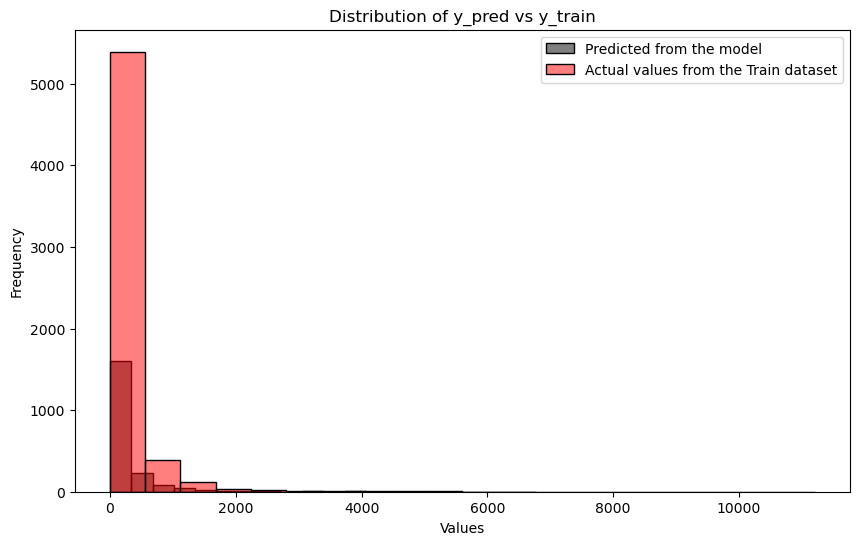

In [71]:
# checking the outcome of the y-pred vs the y_train
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='black', alpha=0.5, bins=20, label='Predicted from the model')
sns.histplot(y_train, color='red', alpha=0.5, bins=20, label='Actual values from the Train dataset')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of y_pred vs y_train')
plt.legend()

# Display the plot
plt.show()

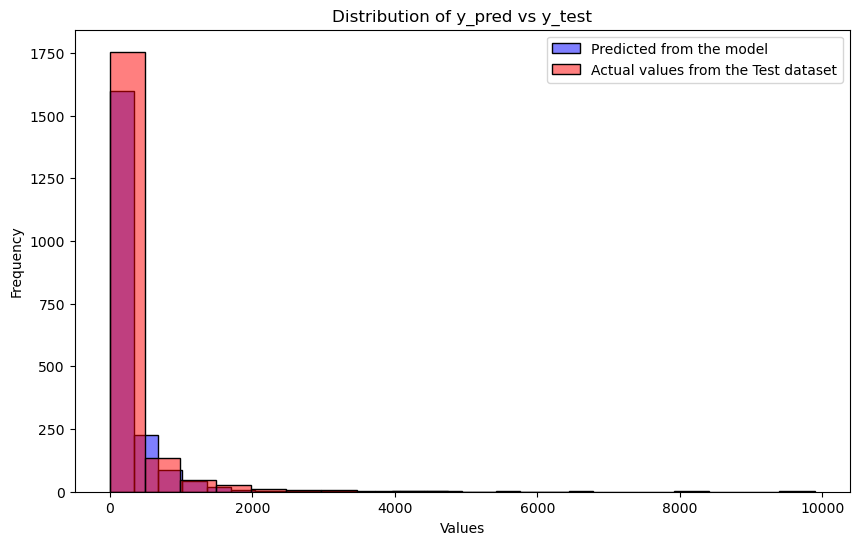

In [ ]:
# checking the outcome of the y-pred vs the y_test
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='blue', alpha=0.5, bins=20, label='Predicted from the model')
sns.histplot(y_test, color='red', alpha=0.5, bins=20, label='Actual values from the Test dataset')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of y_pred vs y_test')
plt.legend()

# Display the plot
plt.show()

# Section 5: Model Evaluation
___

The model will evaluated using the following 

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. R-Squared (R²)
5. Adjusted R-Squared


In [ ]:
# 1. Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

mae

np.float64(106.1528316061967)

In [ ]:
# 2. Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

mse

np.float64(93518.69569005028)

In [ ]:
# 3. Root Mean Squared Error (RMSE)

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)

rmse

np.float64(305.80826622256353)

In [ ]:
# 4. R-Squared (R²)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

0.7061690744270825

In [251]:
# 5. Adjusted R-Squared
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
